In [14]:
import pandas as pd
import matplotlib.pyplot as plt

<font color= yellow> Identificando y Excluyendo Outliers

In [15]:
datos = pd.read_csv('data/alquiler_residencial.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Tipo agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,Departamento


Trabajando con BoxPlot

Un boxplot es una herramienta visual que proporciona una representación gráfica de la distribución de un conjunto de datos. Se muestra la mediana, los cuartiles y los posibles valores atípicos. En pandas, puedes utilizar la función boxplot() para crear un boxplot de tus datos.

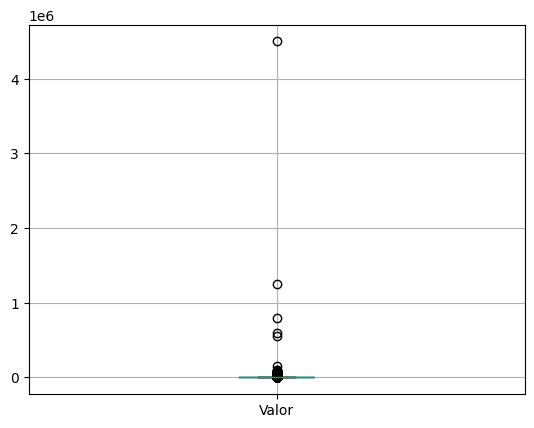

In [16]:
datos.boxplot(['Valor'])
plt.show()

Buscar los valores que estan con una cantidad anormal o exagerada, (ejemplo: valores mayores a 500.000)

In [17]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Tipo agrupado
7731,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,Departamento
10774,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,Casa
12822,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,Departamento
14023,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,Departamento
15715,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,Departamento


<img src="imagenes/compressed_box-plot.png" alt="box-plot" width="600" height="350">


In [18]:
# Crear una serie con los datos que se desean modificar o eliminar
valor = datos['Valor']

In [19]:
# Crear los valores que representan cada quantile segun la grafica del box-plot
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
Limite_inferior = Q1 - 1.5*IIQ
Limite_superior = Q3 + 1.5*IIQ

In [20]:
# Crear el criterio de seleccion que separe los valores buenos de los valores errados o exagerados
seleccion = ((valor >= Limite_inferior) & (valor <= Limite_superior))

In [21]:
datos_new = datos[seleccion]

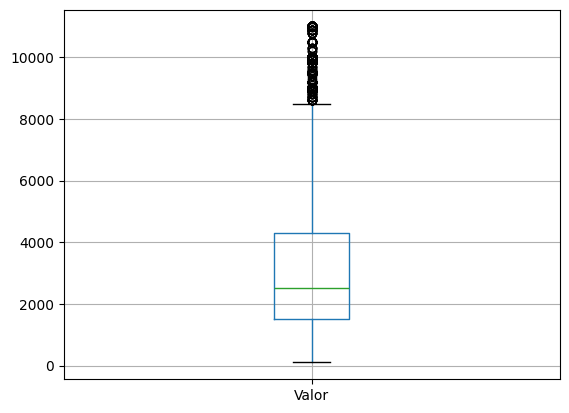

In [22]:
# Nos muestra la media de los datos y en el rango que se encuentran
datos_new.boxplot(['Valor'])
plt.show()

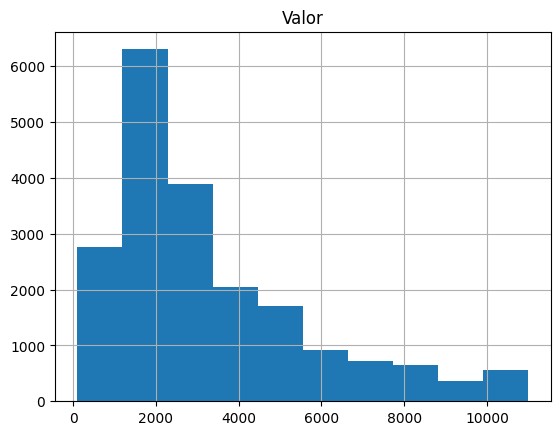

In [25]:
# mostrar el histograma de los datos que estan en la seleccion del bos_plot
datos_new.hist(['Valor'])
plt.show()

Continuando con los Box-Plot

<font color= yellow> Identificar los valores pero teniendo en cuenta el tipo

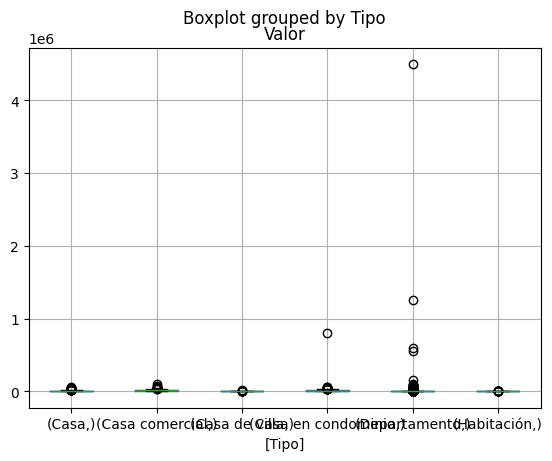

In [28]:
datos.boxplot(['Valor'], by = ['Tipo'])
plt.show()

In [31]:
grupo_tipo = datos.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [32]:
grupo_tipo.groups

{'Casa': [1, 22, 54, 57, 97, 101, 146, 162, 182, 241, 253, 256, 267, 289, 313, 319, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 517, 548, 549, 574, 579, 580, 626, 630, 639, 644, 645, 670, 686, 710, 731, 734, 771, 782, 792, 869, 886, 953, 999, 1046, 1053, 1136, 1141, 1143, 1175, 1196, 1268, 1275, 1336, 1355, 1370, 1391, 1434, 1448, 1452, 1463, 1468, 1495, 1498, 1511, 1611, 1629, 1681, 1687, 1691, 1696, 1709, 1734, 1742, 1787, 1836, 1861, 1901, 1931, 1959, 1968, 1987, 2046, 2066, 2083, 2102, 2128, 2134, 2135, 2160, 2198, 2229, 2232, 2239, ...], 'Casa comercial': [58, 138, 195, 327, 454, 491, 565, 578, 627, 649, 768, 784, 828, 910, 912, 914, 975, 1061, 1206, 1317, 1401, 1423, 1457, 1521, 1536, 1790, 1976, 2194, 2522, 2549, 2569, 2618, 2626, 2669, 2696, 2832, 2904, 2979, 3135, 3146, 3159, 3249, 3324, 3376, 3378, 3389, 3398, 3613, 3881, 3934, 3994, 4038, 4049, 4510, 4594, 4791, 4818, 4875, 4953, 4980, 5010, 5069, 5092, 5124, 5272, 5326, 5330, 5331, 5399, 5429, 5554, 5673, 5748, 5

In [33]:
# Crear los valores que representan cada quantile segun la grafica del box-plot
Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)
IIQ = Q3 - Q1
Limite_inferior = Q1 - 1.5*IIQ
Limite_superior = Q3 + 1.5*IIQ

In [34]:
Limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [35]:
Limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento           9950.0
Habitación             2400.0
Name: Valor, dtype: float64

In [36]:
# Crear un DataFrame en blanco
datos_new = pd.DataFrame()

In [37]:
# Recorrer cada keys del grupo_tipo
for tipo in grupo_tipo.groups.keys():
   eh_tipo = datos['Tipo'] == tipo
   eh_dentro_limite = (datos['Valor'] >= Limite_inferior[tipo]) & (datos['Valor'] <= Limite_superior[tipo])
   seleccion = eh_tipo & eh_dentro_limite
   datos_seleccion = datos[seleccion]
   datos_new = pd.concat([datos_new, datos_seleccion]) 

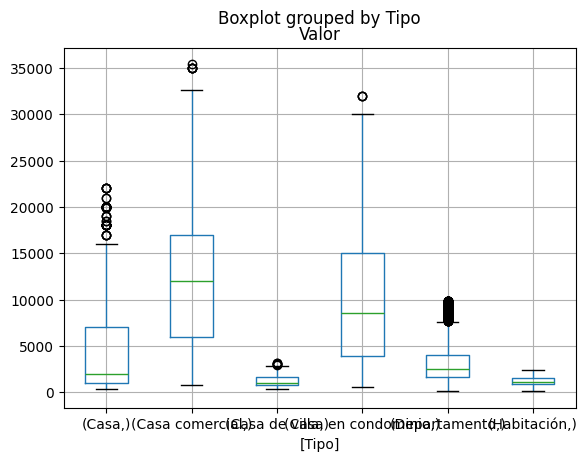

In [41]:
datos_new.boxplot(['Valor'], by = ['Tipo'])
plt.show()

In [42]:
datos_new.to_csv('data/alquiler_residencial_sin_outliers.csv', sep=';', index= False)